<a href="https://colab.research.google.com/github/VitaT/ML-python/blob/main/11_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different linear regression models

let's pick up from last time and try some different model and build a cross-validation scheme for that.

The reason for train/test splits of data is always, at heart, a desire to avoid overfitting




In [ ]:
import matplotlib.pyplot as plt   # visualization
import seaborn as sns             # visualization
import numpy as np                # data manipulation
import pandas as pd               # data manipulation
from sklearn import datasets, model_selection
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import KFold, cross_val_score

plt.style.use('seaborn-whitegrid')

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# about the dataset: https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset
# age age in years
# sex
# bmi body mass index
# bp average blood pressure
# s1 tc, T-Cells (a type of white blood cells)
# s2 ldl, low-density lipoproteins
# s3 hdl, high-density lipoproteins
# s4 tch, thyroid stimulating hormone
# s5 ltg, lamotrigine
# s6 glu, blood sugar level


# convert diabetes_X to pandas DataFrame format for ploting
column_names = ["age", "sex", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]
df = pd.DataFrame(diabetes_X, columns = column_names)
df["y"] = diabetes_y

In [ ]:
# we had more than one feature
diabetes_X.shape

(442, 10)

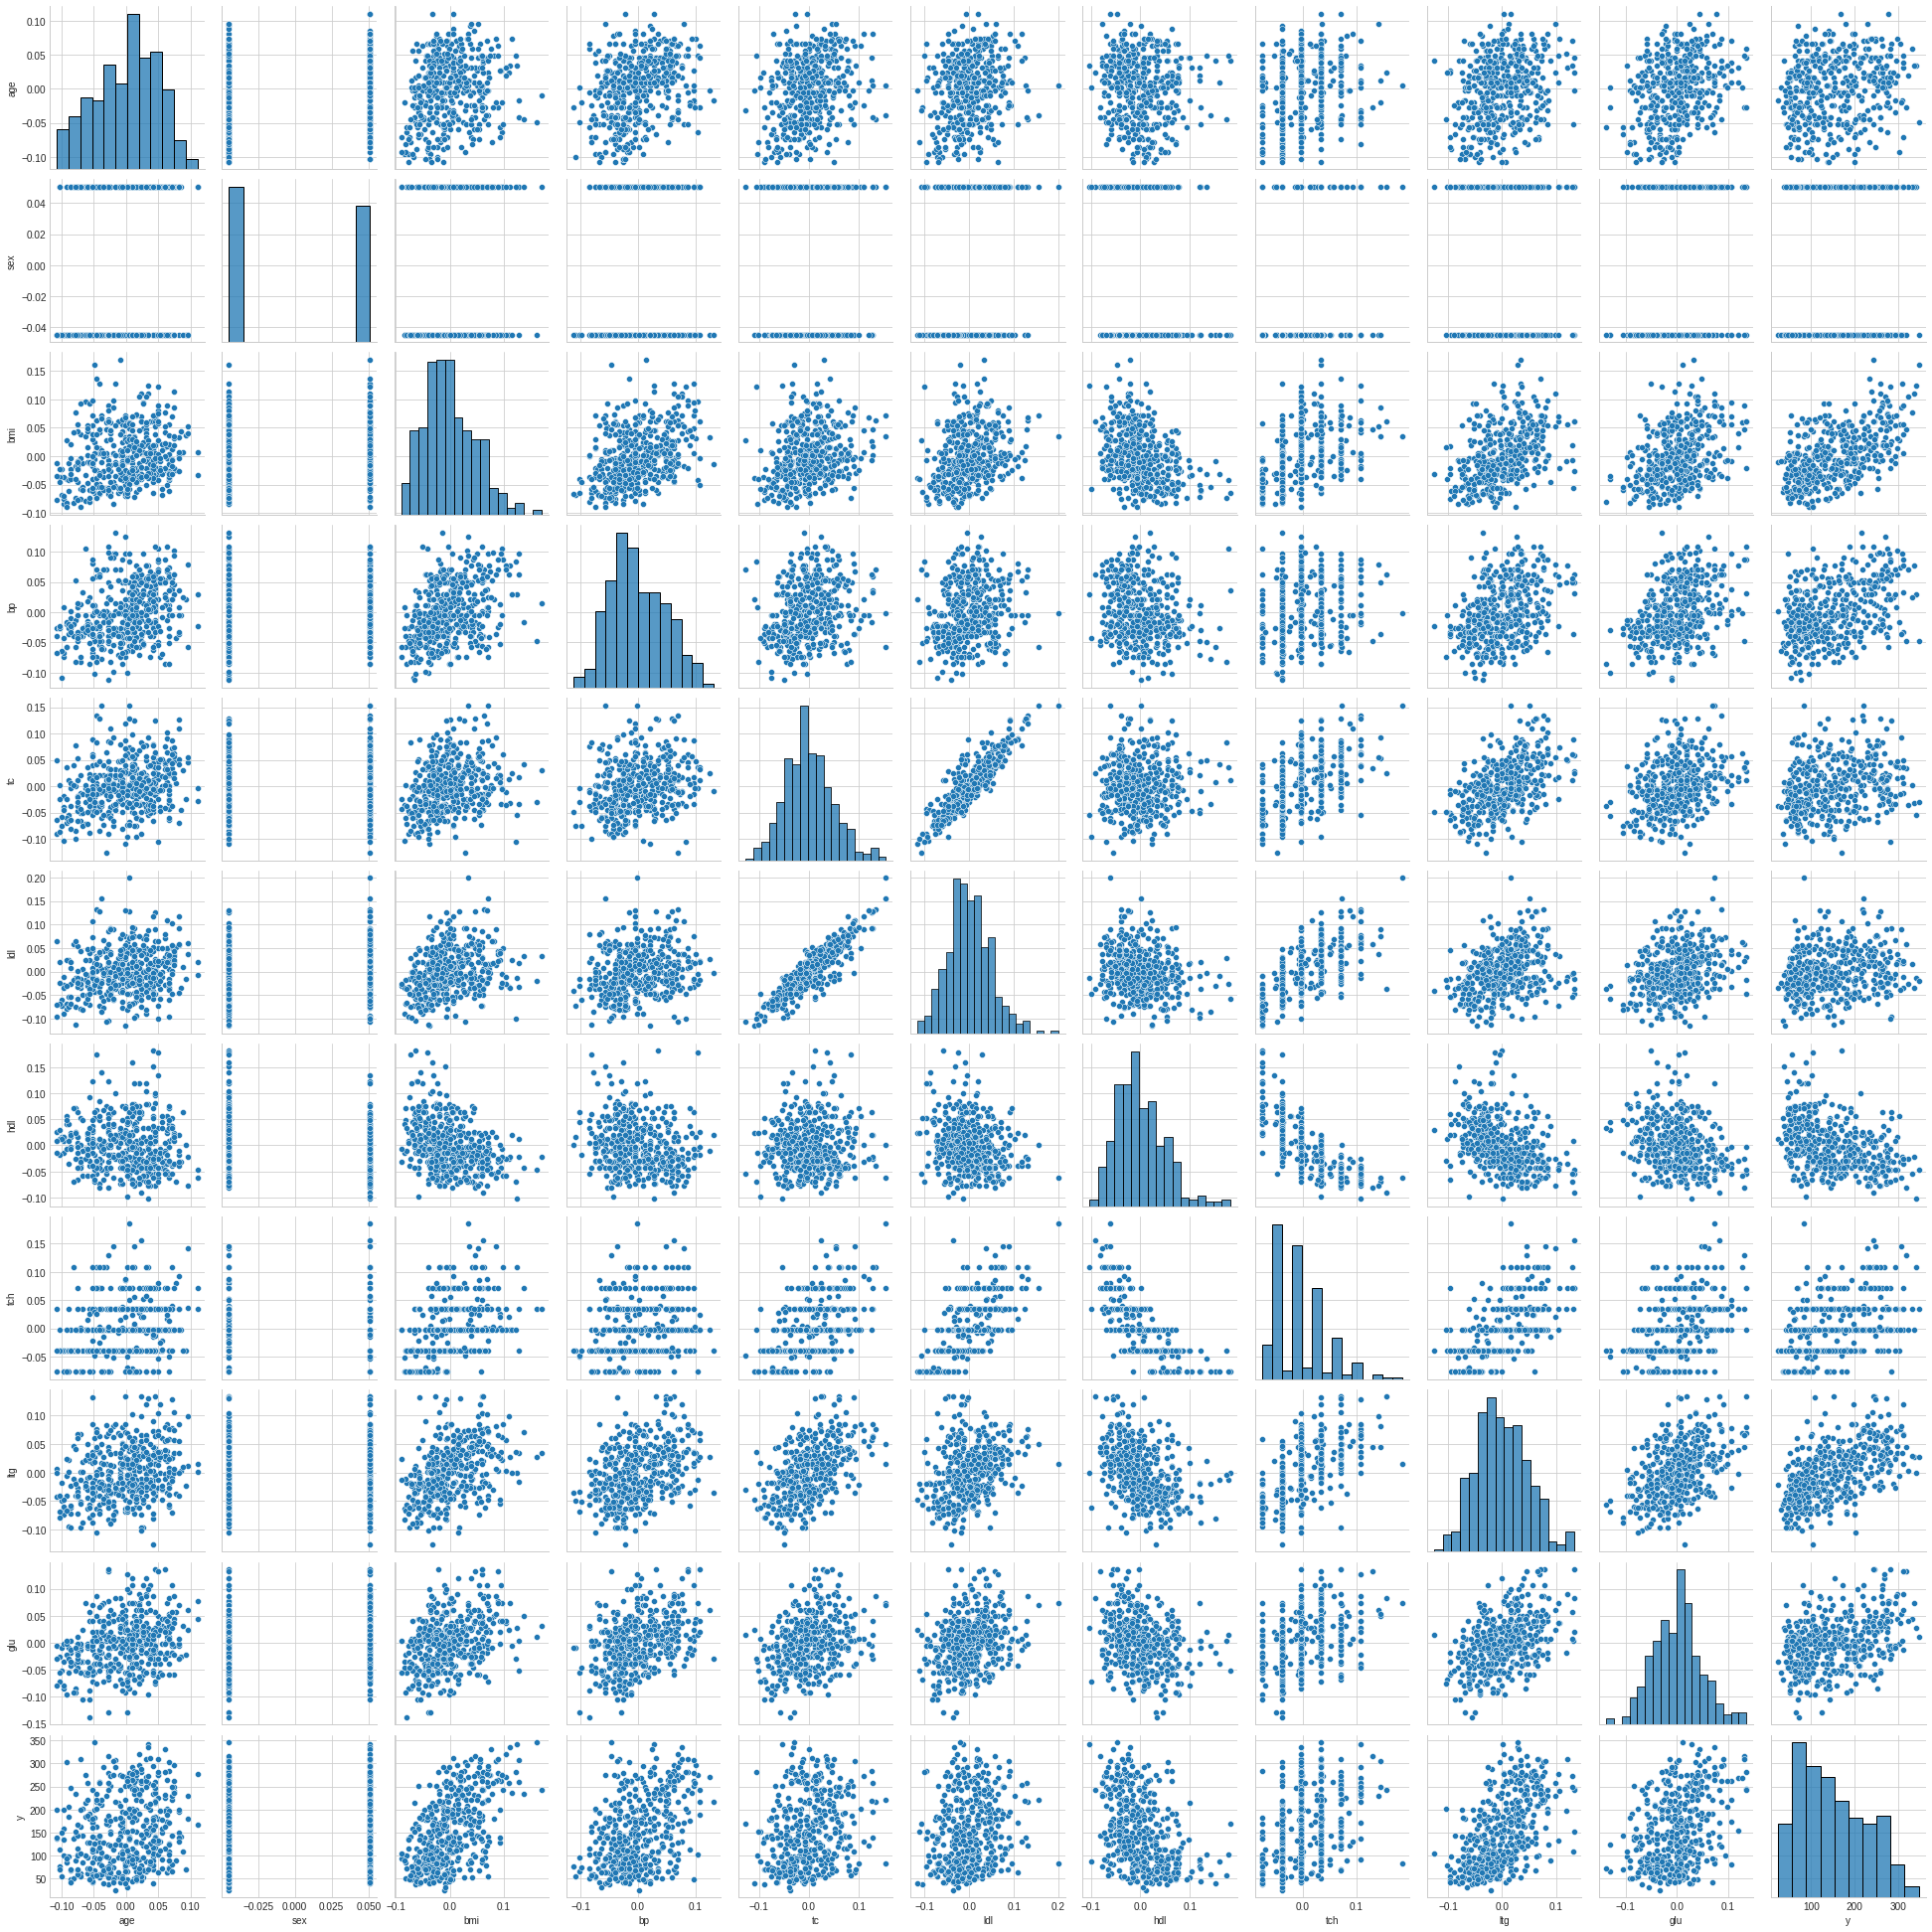

In [ ]:
# we can explore them a bit graphically
sns.pairplot(df)

In [ ]:
# The idea was that you try different models with different predictors :) and their combinations
# e.g.
# var 1) using all predictors
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = model_selection.train_test_split(diabetes_X, diabetes_y, test_size = 0.3, random_state = 42)

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)
train_diabetes_y_pred = regr.predict(diabetes_X_train)

# The coefficients
w_bmi = regr.coef_
i_bmi = regr.intercept_
print('Coefficient:')
print(w_bmi)
print('Intercept: %.2f'% i_bmi)
# Test dataset evaluation:
print('Test Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Test R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# train dataset evaluation:
print('Train Mean squared error: %.2f'% mean_squared_error(diabetes_y_train, train_diabetes_y_pred))
print('Train R-squared: %.2f' % r2_score(diabetes_y_train, train_diabetes_y_pred))

Coefficient:
[  29.25034582 -261.70768053  546.29737263  388.40077257 -901.95338706
  506.761149    121.14845948  288.02932495  659.27133846   41.37536901]
Intercept: 151.01
Test Mean squared error: 2821.74
Test R-squared: 0.48
Train Mean squared error: 2924.04
Train R-squared: 0.52


In [ ]:
# what about which predictor does the best if we use it alone?
col = 0
for col in range(diabetes_X.shape[1]):
  # Create linear regression object
  print("------------------Column number " + str(col))
  train_X = diabetes_X_train[:, np.newaxis, col]
  test_X  = diabetes_X_test[:, np.newaxis, col]
  regr = linear_model.LinearRegression()
  regr.fit(train_X, diabetes_y_train)
  diabetes_y_pred = regr.predict(test_X)
  train_diabetes_y_pred = regr.predict(train_X)
  # The coefficients
  w_bmi = regr.coef_
  i_bmi = regr.intercept_
  print('Coefficient:')
  print(w_bmi)
  print('Intercept: %.2f'% i_bmi)
  # Test dataset evaluation:
  print('Test Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))
  print('Test R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
  # train dataset evaluation:
  print('Train Mean squared error: %.2f'% mean_squared_error(diabetes_y_train, train_diabetes_y_pred))
  print('Train R-squared: %.2f' % r2_score(diabetes_y_train, train_diabetes_y_pred))


------------------Column number 0
Coefficient:
[323.57449776]
Intercept: 153.54
Test Mean squared error: 5256.09
Test R-squared: 0.03
Train Mean squared error: 5924.50
Train R-squared: 0.04
------------------Column number 1
Coefficient:
[5.7448485]
Intercept: 153.90
Test Mean squared error: 5427.26
Test R-squared: -0.01
Train Mean squared error: 6148.21
Train R-squared: 0.00
------------------Column number 2
Coefficient:
[988.41931249]
Intercept: 151.04
Test Mean squared error: 3884.94
Test R-squared: 0.28
Train Mean squared error: 3899.45
Train R-squared: 0.37
------------------Column number 3
Coefficient:
[730.93498498]
Intercept: 152.98
Test Mean squared error: 4436.93
Test R-squared: 0.18
Train Mean squared error: 4921.12
Train R-squared: 0.20
------------------Column number 4
Coefficient:
[305.33203098]
Intercept: 153.43
Test Mean squared error: 5051.23
Test R-squared: 0.06
Train Mean squared error: 5933.82
Train R-squared: 0.03
------------------Column number 5
Coefficient:
[260.

# Cross-validation schemes

The reason for train/test splits of data is always, at heart, a desire to avoid overfitting.

Since we, by definition, do not yet have the data we do not have, we want a proxy for "the novel data we might see in the future."
Obviously, the best proxy we can come up with is simply a portion of the original data that did not participate in the fitting of the model. We rely on an assumption that our sample data is similar to observations we will obtain in the future. However, there is really nothing better we might choose as such a proxy.

Using train_test_split() to divide the data between a training and testing set if a very reasonable approach. By default, this utility function shuffles the data before splitting it; in general this will minimize effects related to order of collection or collation of the dataset. However, especially on moderate sized datasets of hundreds or thousands of samples (but not really of tens of thousands, or millions), the particular accident of a randomized split can still lead to artifacts.

train_test_split() performs just one split of a data array, while all the other splitting classes in sklearn.model_selection produce an iterator over multiple distinct splits.


**KFold**

<img src="https://github.com/DavidMertz/ML-Webinar/raw/8c3edd90de248094f164ecb11809f3e1307006e9/img/KFold.png" alt="Drawing" width="400"/>

One of the simplest such techniques is KFold. This simply divides the data into multiple "folds." By default, KFold does not shuffle the data first; therefore, if the dataset is meaningfully ordered in some manner already, the folds may have importantly different characteristics.

The potential differences among the folds can be good or bad, depending on your purpose. Either way, be aware of it. If you hope your model will generalize to sample collections with a characteristic not in the training, there is an advantage to not shuffling. However, it equivalently means that a particular loop through fitting may not have the opportuntity to fit to data with that characteristic.


In [ ]:
kf = KFold(n_splits=5, shuffle=False, random_state=42)
type(kf)
for train_index, test_index in kf.split(range(15)):
  print(train_index, test_index)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
type(kf)
for train_index, test_index in kf.split(range(15)):
  print(train_index, test_index)

kf.split(diabetes_X)

for n, (train, test) in enumerate(kf.split(diabetes_X)):
    print("Iteration: %d; Train shape: %s; Test shape: %s" % (n, train.shape, test.shape))

<generator object _BaseKFold.split at 0x7f92ff10e678>

One thing that might be surprising at first is that the shape of training arrays are not, e.g. (353, 4). What we iterate over is a collections of index positions into the underlying NumPy arrays. So, for example, in the first iteration, the test data is the first 1/3rd of the rows in the data.


In [ ]:
train, test = next(KFold(n_splits=5).split(diabetes_X, diabetes_y))
print(test)
print(train)
diabetes_X[test].shape
diabetes_X[train].shape

array([[-0.04547248, -0.04464164, -0.04824063, ..., -0.03949338,
        -0.02479119,  0.01963284],
       [ 0.01264814, -0.04464164, -0.02560657, ..., -0.0763945 ,
        -0.07212845,  0.01134862],
       [ 0.04534098, -0.04464164,  0.0519959 , ...,  0.03430886,
         0.03723201,  0.01963284],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

**Stratified Kfold**

This cross-validation object is a variation of KFold that returns stratified folds. It takes group information into account to avoid building folds with imbalanced class distributions (for binary or multiclass classification tasks). The folds are made by preserving the percentage of samples for each class.
Because this split is sensitive to the classes of the target, it must take a y argument to the .split() method.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# used when predicting classes, i.e. classification
categ = np.random.binomial(1, 0.2, len(diabetes_X))
skf = StratifiedKFold(n_splits=3).split(diabetes_X, categ)
for n, (train, test) in enumerate(skf):
    print("Iteration: %d; Train shape: %s; Test shape: %s" % (
                       n, train.shape, test.shape))

Iteration: 0; Train shape: (294,); Test shape: (148,)
Iteration: 1; Train shape: (295,); Test shape: (147,)
Iteration: 2; Train shape: (295,); Test shape: (147,)


0.20068027210884354

**LeaveOneOut**

This splitting technique utilizes the maximum possible size for each training set which still creating a nominal testing set. This can be useful to train models as completely as possible while still allowing validation. Of course, this iterates over a number of splits equal to the number of samples, so is the most computationally spendy split possible also.


In [ ]:
from sklearn.model_selection import LeaveOneOut
# split generator
loo = LeaveOneOut().split(diabetes_X)

all_folds = []
for n, (train, test) in enumerate(loo):
  all_folds.append((n, train, test))
  
n, train, test = all_folds[0]
print("Iteration: %d; Train shape: %s; Test shape: %s; Test index: %s" % (n, train.shape, test.shape, test))
print("...")
n, train, test = all_folds[-1]
print("Iteration: %d; Train shape: %s; Test shape: %s; Test index: %s" % (n, train.shape, test.shape, test))


Iteration: 0; Train shape: (441,); Test shape: (1,); Test index: [0]
...
Iteration: 441; Train shape: (441,); Test shape: (1,); Test index: [441]


Other ways how we can split data is written here: https://scikit-learn.org/stable/modules/cross_validation.html

**Cross validation**

The point of all splitters (Kfold and others) is almost universally to be used in conjunction with cross validation. The function cross_val_score() performs repeated training and scoring relative to muliple train/test splits

In [ ]:
regr = LinearRegression()
scores = cross_val_score(regr, diabetes_X, diabetes_y, cv=5)
scores

array([0.42955643, 0.52259828, 0.4826784 , 0.42650827, 0.55024923])

For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. 
But we can also give an iterable like one of the scorers discussed.

The "score" given for each iteration is that produced by the .score() method of the estimator being used. You can manually specify a different scoring parameter (possible values here:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) or with custom  scorer=my_scorer parameter to cross_val_score if you want to use a different metric.


In [ ]:
scores = cross_val_score(regr, diabetes_X, diabetes_y, cv=5, scoring='neg_mean_squared_error')
abs(scores)

array([2779.92210988, 3028.84335258, 3237.70099059, 3008.69133019,
       2910.20693327])

In [ ]:
# using LOOCV split generator
loo = LeaveOneOut().split(diabetes_X)

scores = cross_val_score(regr, diabetes_X, diabetes_y, cv=loo, scoring='neg_mean_squared_error')
abs(scores)
abs(scores).mean()

3004.610364064945

The `cross_validate` function differs from `cross_val_score` in two ways:

* It allows specifying multiple metrics for evaluation.

* It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.


In [ ]:
from sklearn.model_selection import cross_validate
scoring = ["r2", "neg_mean_squared_error", "explained_variance"]
scores = cross_validate(regr, diabetes_X, diabetes_y, scoring=scoring, cv=5, return_train_score=True)
scores.keys()
scores

{'fit_time': array([0.00090337, 0.00068426, 0.00066948, 0.00046802, 0.00047326]),
 'score_time': array([0.00103617, 0.00126934, 0.00082254, 0.00083566, 0.00082159]),
 'test_explained_variance': array([0.41207334, 0.52291892, 0.49599904, 0.44137682, 0.5372718 ]),
 'test_neg_mean_squared_error': array([-2869.02439731, -3055.00311817, -3178.15784589, -2935.55887757,
        -2995.74164657]),
 'test_r2': array([0.41127253, 0.51847502, 0.49219224, 0.44044818, 0.53703047]),
 'train_explained_variance': array([0.51868316, 0.50426714, 0.51506359, 0.52498145, 0.50266846]),
 'train_neg_mean_squared_error': array([-2935.87943571, -2870.17751424, -2835.67046853, -2893.39038613,
        -2880.75706122]),
 'train_r2': array([0.51868316, 0.50426714, 0.51506359, 0.52498145, 0.50266846])}

In [ ]:
print("test R-squared " + str(scores["test_r2"]))
print("train R-squared " + str(scores["train_r2"]))

test R-squared [0.41127253 0.51847502 0.49219224 0.44044818 0.53703047]
train R-squared [0.51868316 0.50426714 0.51506359 0.52498145 0.50266846]


In [ ]:
# Going back to our questions about predictors -- does cross validation change anything?
scoring = ["r2", "neg_mean_squared_error", "explained_variance"]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
col = 0
for col in range(diabetes_X.shape[1]):
  # Create linear regression object
  print("------------------Column number " + str(col))
  scores = cross_validate(regr, diabetes_X[:, np.newaxis, col], diabetes_y, scoring=scoring, cv=kf, return_train_score=True)
  # scores.keys()
  # scores["test_r2"]
  # Test dataset evaluation:
  print('Test Mean squared error: %.2f'%  np.mean(abs(scores["test_neg_mean_squared_error"])))
  print('Test R-squared: %.2f' %  np.mean(scores["test_r2"]))
  # train dataset evaluation:
  print('Train Mean squared error: %.2f'%  np.mean(abs(scores["train_neg_mean_squared_error"])))
  print('Train R-squared: %.2f'  %  np.mean(scores["train_r2"]))


Test R-squared: 0.13



# Curse of dimensionality

If there are few data points per dimension, noise in the observations induces high variance.

A solution in high-dimensional statistical learning is to a) eliminate some of the predictors (selection or shinkage) or b) combine the predictors and make new ones

solutions:
a) forward, backward, hybrid selection, shrinking regression coeficients to zero (e.g. Lasso, Ridge)
b) perform PCA and use few principal components for the prediction


Optimal number of features : 7


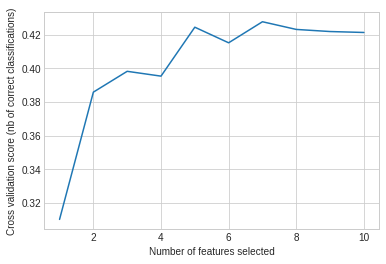

In [ ]:
from sklearn.feature_selection import RFECV

# build estimator
regr = LinearRegression()
# regression
rfecv = RFECV(estimator=regr, step=1, cv=KFold(10, shuffle=True, random_state=42), scoring='neg_mean_squared_error')
rfecv.fit(diabetes_X_train, diabetes_y)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# regression. different scoring
rfecv = RFECV(estimator=regr, step=1, cv=KFold(10, shuffle=True, random_state=42), scoring='r2')
rfecv.fit(diabetes_X, diabetes_y)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [ ]:
# Get columns to keep and create new dataframe with those only
cols = rfecv.get_support(indices=True)
[column_names[index] for index in cols]  # what columns ar these?

features_df_new = diabetes_X[:, cols]
# or
X_new = rfecv.transform(diabetes_X)

['sex', 'bmi', 'bp', 'tc', 'ldl', 'ltg']

let's use this scheme: 

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="Drawing" width="400"/>

We will find best parameter i.e. the number of features to use using training data, then fit a model using those parameters and test it on unseen test data



Optimal number of features : 7


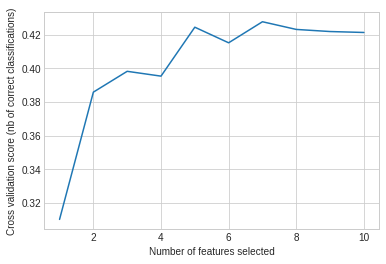

In [ ]:
# regression. different scoring
rfecv = RFECV(estimator=regr, step=1, cv=KFold(10, shuffle=True, random_state=42), scoring='r2')
rfecv.fit(diabetes_X_train, diabetes_y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
cols = rfecv.get_support(indices=True)
selected_columns = [column_names[index] for index in cols]  # what columns ar these?
features_df_new_train = diabetes_X_train[:, cols]
features_df_new_test = diabetes_X_test[:, cols]

In [ ]:
# linear fit
regr = LinearRegression()
regr.fit(features_df_new_train, diabetes_y_train)
diabetes_y_pred = regr.predict(features_df_new_test)
train_diabetes_y_pred = regr.predict(features_df_new_train)


# The coefficients
print("columns" + str(selected_columns))
w_bmi = regr.coef_
i_bmi = regr.intercept_
print('Coefficient:')
print(w_bmi)
print('Intercept: %.2f'% i_bmi)
# Test dataset evaluation:
print('Test Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Test R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# train dataset evaluation:
print('Train Mean squared error: %.2f'% mean_squared_error(diabetes_y_train, train_diabetes_y_pred))
print('Train R-squared: %.2f' % r2_score(diabetes_y_train, train_diabetes_y_pred))



columns['sex', 'bmi', 'bp', 'tc', 'ldl', 'tch', 'ltg']
Coefficient:
[-257.3723178   553.87622953  401.0673526  -702.44113783  379.14067531
  221.64359969  606.92936674]
Intercept: 151.09
Test Mean squared error: 2821.73
Test R-squared: 0.48
Train Mean squared error: 2931.53
Train R-squared: 0.52


# Ridge

Ridge and Lasso are shrinkage methods. They use penalties to forcufully increase model bias and reduce variance

<img src="https://raw.githubusercontent.com/VitaT/ML-python/main/pic/Ridge.png" alt="Drawing" width="400"/>

The complexity parameter $\lambda$ controls the amount of shrinkage: the larger the value of , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.
Graphically this can shown as:

<img src="https://raw.githubusercontent.com/DavidMertz/ML-Webinar/8c3edd90de248094f164ecb11809f3e1307006e9/img/ridge_regression_geomteric.png" alt="Drawing" width="400"/>

The difference between Lasso and Ridge is their penalty:

<img src="https://raw.githubusercontent.com/VitaT/ML-python/main/pic/lasso_ridge.png" alt="Drawing" width="500"/>

.
<img src="https://www.researchgate.net/profile/Nagulan_Ratnarajah/publication/339765709/figure/fig1/AS:896772259983360@1590818576481/Estimation-graph-for-LASSO-left-side-and-Ridge-Regression-right-side-Shown-are.ppm" alt="Drawing" width="400"/>

visualization: <https://twitter.com/i/status/1328421322821693441>



In [392]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold, GridSearchCV

# first find out the value of hyperparameter alpha
alpha = np.logspace(-6, 6, 13)
ridge_CVm = RidgeCV(alphas = alpha)
ridge_CVm.fit(diabetes_X_train, diabetes_y_train)

ridge_CVm.coef_
ridge_CVm.alpha_

ridge_CVm.score(diabetes_X_test, diabetes_y_test)

0.4776735217316362

In [395]:
# Compute paths
coefs = []
for a in alpha:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(diabetes_X_train, diabetes_y_train)
    coefs.append(ridge.coef_)

#  Display results
ax = plt.gca()

ax.plot(alpha, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

[array([  46.353261  , -236.49565404,  717.49302564,  339.25486584,
        -483.6414251 ,  139.72355149,   59.9532152 ,  299.40308234,
         500.72011571,  209.01900264]),
 array([  46.35878443, -236.48876997,  717.49606302,  339.24716586,
        -483.06960222,  139.28984592,   59.68834667,  299.30497856,
         500.50086776,  209.02570778]),
 array([  46.41325945, -236.42036709,  717.52462647,  339.17095541,
        -477.43417461,  135.01741472,   57.0766897 ,  298.33577866,
         498.34057482,  209.09187709]),
 array([  46.89198334, -235.77463379,  717.65301754,  338.47770696,
        -428.287064  ,   97.91607431,   34.18546331,  289.67808746,
         479.53805025,  209.67671132]),
 array([  49.04653793, -230.93092553,  712.75564353,  334.37126971,
        -226.6925164 ,  -47.74733078,  -64.09254166,  246.23020126,
         403.69335814,  212.39896114]),
 array([  54.29070087, -198.59627046,  639.19635788,  314.45630606,
         -66.29892296, -109.36712448, -159.69938313,

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both.

In [378]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import KFold, GridSearchCV


lasso_CVm = LassoCV(cv=5, random_state=0)
lasso_CVm.fit(diabetes_X_train, diabetes_y_train)

lasso_CVm.coef_
lasso_CVm.alpha_

lasso_CVm.score(diabetes_X_test, diabetes_y_test)


0.47824387082749314

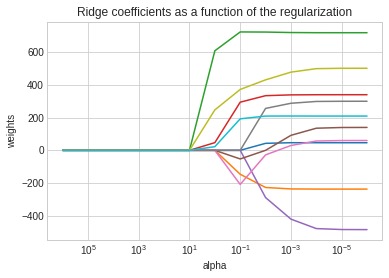

In [396]:
# Compute paths
coefs = []
for a in alpha:
    ridge = Lasso(alpha=a, fit_intercept=False)
    ridge.fit(diabetes_X_train, diabetes_y_train)
    coefs.append(ridge.coef_)
#  Display results
ax = plt.gca()

ax.plot(alpha, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

**KNN**

Given a value for K and a prediction point $x_{0}$, KNN
regression first identifies the K training observations that are closest to $x_{0}$, represented by $N_{0}$. It then estimates $f(x_{0})$ using the average of all the training responses in $N_{0}$. In other words,

$$\hat{f}(x_{0}) = \frac{1}{K}\sum_{x_{i}\in N_{0}}y_{i}$$

In [410]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(diabetes_X_train, diabetes_y_train)
knn.score(diabetes_X_test, diabetes_y_test)


0.23960785340003807

In [443]:
all_scores = []
mean_scores = []
kf = KFold(5, True, 42)
# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    scores = cross_val_score(knn, diabetes_X_train, diabetes_y_train, cv=kf, scoring='neg_mean_squared_error')
    all_scores.append(scores)
    mean_scores.append(np.mean(scores))


Text(0, 0.5, 'score')

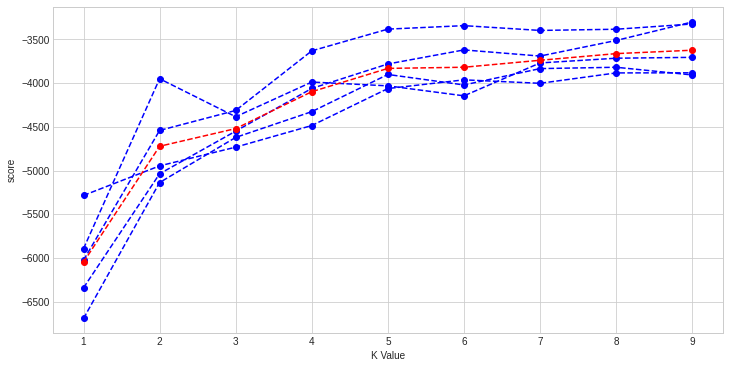

In [445]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), all_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.plot(range(1, 10), mean_scores, color='red', linestyle='dashed', marker='o', markerfacecolor='red')
plt.xlabel('K Value')
plt.ylabel('score')

Trying out different regression models.

In [ ]:
regressors = [
    LinearRegression(), 
    KNeighborsRegressor(),
    KNeighborsRegressor(n_neighbors=9, metric='manhattan')
]

In [ ]:
X_train = diabetes_X_train
y_train = diabetes_y_train
X_test = diabetes_X_test
y_test = diabetes_y_test

In [ ]:
head = 3
for model in regressors[:head]:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    pred_train = model.predict(X_train)
    print(model)
    print("\ttrain")
    print("\tExplained variance:", explained_variance_score(y_train, pred_train))
    print("\tMean squared error:", mean_squared_error(y_train, pred_train))
    print("\tR2 score:", r2_score(y_train, pred_train))
    print("\ttest")
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean squared error:", mean_squared_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	train
	Explained variance: 0.524413200822697
	Mean squared error: 2924.0416789072897
	R2 score: 0.524413200822697
	test
	Explained variance: 0.47988274267525455
	Mean squared error: 2821.7385595843784
	R2 score: 0.4772920174157329

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
	train
	Explained variance: 0.5755719046510198
	Mean squared error: 2627.1707443365694
	R2 score: 0.5726983872342755
	test
	Explained variance: 0.4075489698647614
	Mean squared error: 3222.117894736842
	R2 score: 0.4031244536507893

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')
	train
	Explained variance: 0.5146224031943629
	Mean squared error: 3005.0831835071313

References:

based on: 
* https://github.com/DavidMertz/ML-Webinar/blob/master/TrainTest.ipynb
* https://scikit-learn.org/stable/modules/cross_validation.html 
* https://github.com/DavidMertz/ML-Webinar/blob/master/Regression.ipynb
